### The below code is an example for using the model for predicting the face has mask or not.However you can customize with your own code.

Since the model size is bigger I cannot upload it here.please go through the Kaggle link inorder to get the saved model. Checkout this link https://www.kaggle.com/punithanand/face-mask-detection-pytorch/edit

Run the Notebook using above model and at the end you can download it from kaggle output directory.

In [1]:
import torch
from PIL import Image
import os
from torchvision import transforms
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings("ignore")
# pip install -r requirements.txt | grep -v 'already satisfied'

if torch.cuda.is_available():
    device=torch.device("cuda")
else:
    device=torch.device("cpu")
    
model=torch.load(open(r"resnet_face_mask_detect","rb"),map_location=device)

!pip install r-facenet-pytorch | grep -v 'already satisfied' || True

from facenet_pytorch import MTCNN
mtcnn = MTCNN()

my_transform=transforms.Compose([transforms.Resize((224,224)),
                                 transforms.RandomCrop((224,224)),
                                 transforms.ToTensor()]) 

model=model.eval()

class TagImages:
    def __init__(self):
        
        self.filepath=filepath
        img=Image.open(self.filepath)
        boxes, _ = mtcnn.detect(img)
        predictions=[]
        for i in boxes:
            im_pr=img.crop(i)
            predict_im=my_transform(im_pr).unsqueeze(0)
            predict_im=predict_im if not torch.cuda.is_available() else predict_im.cpu().numpy()
            output=model(predict_im)
            _,pred=torch.max(output,1)
            predicted=pred.numpy() if not torch.cuda.is_available() else pred.cpu().numpy()
            predictions.append(predicted[0])
        self.boxes=boxes
        self.predictions=predictions
        
    def draw_box_predicted(self,filepath):
            img=plt.imread(self.filepath)
            fig,ax=plt.subplots(1)
            fig.set_size_inches(10,5)
            ax.imshow(img)
            ax.axis('off')
            configuration=["face_no_mask", "face_with_mask"]
            color={"face_no_mask":"r","face_with_mask":"b"}
            for i,j in zip(self.boxes,self.predictions):
                a,b,c,d=i
                patch=patches.Rectangle((a,b),c-a,d-b,linewidth=2, 
                                        edgecolor=color[configuration[j]],facecolor="none",)
                ax.text(a, b, configuration[j],
                        style='italic',bbox={'facecolor': color[configuration[j]], 'alpha': 0.4, 'pad': 10})
                ax.add_patch(patch)
            

    def selected_only(self,filepath,selection):
        self.filepath=filepath
        self.selection=selection.lower()
        predictions_selection=[]
        boxes_selection=[]
        for i,j in zip(self.predictions,self.boxes):
            if self.selection=="face_no_mask" and i==0:
                predictions_selection.append(i)
                boxes_selection.append(j)
            elif self.selection=="face_with_mask" and i==1:
                predictions_selection.append(i)
                boxes_selection.append(j)
            elif self.selection not in ["face_no_mask","face_with_mask"]:
                print("please enter valid selection,\"face_no_mask\" or \"face_with_mask")
                break
        self.predictions=predictions_selection
        self.boxes=boxes_selection
        if not self.predictions:
            print("Entered Selection unavailable in the images")
        else:
            self.draw_box_predicted(self.filepath)

'grep' is not recognized as an internal or external command,
operable program or batch file.


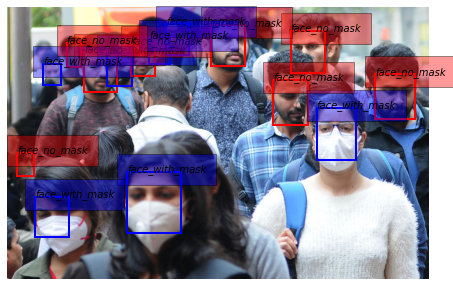

In [2]:
filepath=r"C:\Users\Punit\Downloads\2020_4$largeimg_1023848558.jpg"
TagImages().draw_box_predicted(filepath)

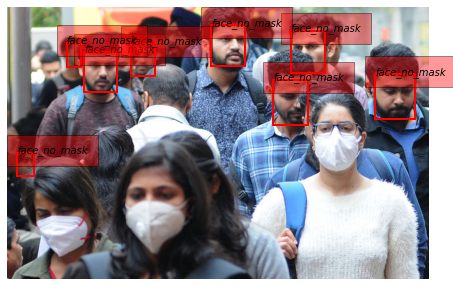

In [3]:
TagImages().selected_only(filepath,"face_no_mask")